In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [2]:
import nltk
from nltk.corpus import stopwords

# Add NLTK data path
nltk.data.path.append('/home/am/corpus/')

# Download stopwords if not already downloaded
nltk.download('stopwords', download_dir='/home/am/corpus/')

# Verify stopwords
try:
    stop_words = set(stopwords.words('english'))
    print(f"Number of stopwords: {len(stop_words)}")
except LookupError as e:
    print(f"Error loading stopwords: {e}")


Number of stopwords: 179


[nltk_data] Downloading package stopwords to /home/am/corpus/...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from stock_text import clean_text

NLTK data path: ['/home/am/nltk_data', '/home/am/Documents/Software Development/10_Academy Training/week1/stock-market-analysis/venv-stock/nltk_data', '/home/am/Documents/Software Development/10_Academy Training/week1/stock-market-analysis/venv-stock/share/nltk_data', '/home/am/Documents/Software Development/10_Academy Training/week1/stock-market-analysis/venv-stock/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/home/am/corpus/', '/home/am/corpus/']
Number of stopwords: 179


In [5]:
from load_data import load_data
df = load_data("/home/am/Documents/Software Development/10_Academy Training/week1/Data/raw_analyst_ratings.csv")

In [6]:
from stock_text import perform_sentiment_analysis
# Perform sentiment analysis
df = perform_sentiment_analysis(df, column='headline')

# Display sentiment counts
print(df['sentiment_label'].value_counts())

# Save the modified DataFrame to a CSV file
df.to_csv('sentiment_analysis_output.csv', index=False)

# Display sentiment counts and save them to a text file
sentiment_counts = df['sentiment_label'].value_counts()

# Save sentiment counts to a text file
with open('sentiment_counts.txt', 'w') as f:
    f.write(str(sentiment_counts))


In [7]:
df = df.head()

In [8]:
from stock_text import extract_topics
# Extract topics
topics = extract_topics(df, column='headline', num_topics=5, num_keywords=10)

# Display topics
for topic, keywords in topics.items():
    print(f"{topic}: {', '.join(keywords)}")

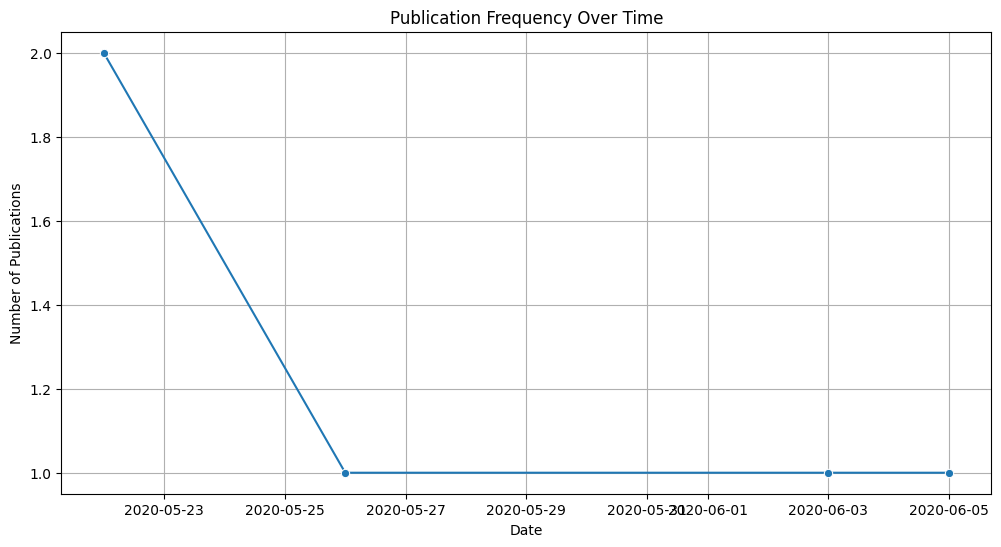

<Figure size 640x480 with 0 Axes>

In [9]:
import os
import matplotlib.pyplot as plt
from stock_time_series import analyze_publication_frequency
daily_counts = analyze_publication_frequency(df, date_column='date')
save_path = "plots/publication_frequency.png"
    
# Ensure the 'plots' directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the plot to the specified path
plt.savefig(save_path)

/home/am/Documents/Software Development/10_Academy Training/week1/stock-market-analysis/scripts/stock_time_series.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_count, x='hour', y='publication_count', palette='viridis')


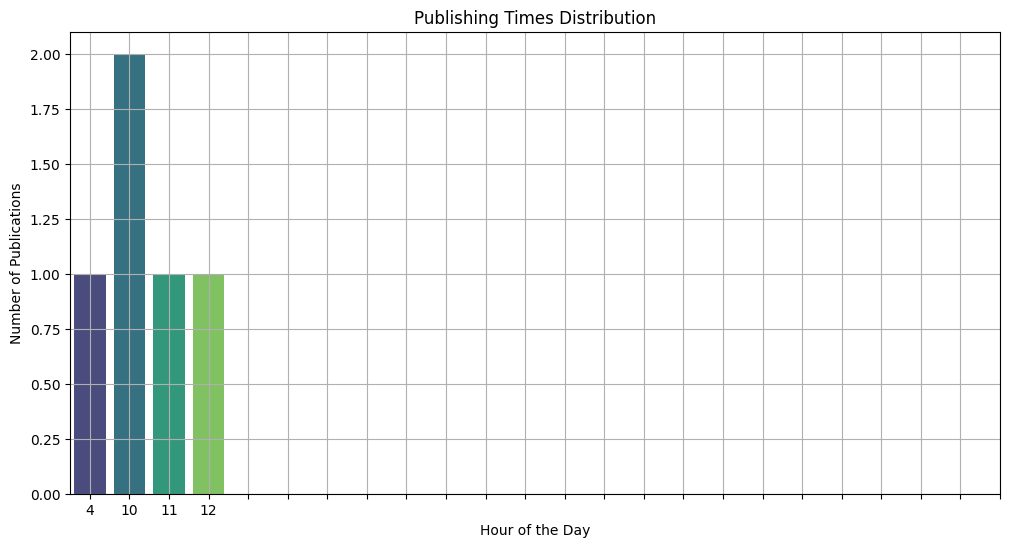

<Figure size 640x480 with 0 Axes>

In [11]:
import os
from stock_time_series import analyze_publishing_times
# Analyze publishing times
hourly_counts = analyze_publishing_times(df, date_column='date')
save_path = "plots/publication_times.png"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path)